In [ ]:
!pip install duckduckgo_search

In [ ]:
!df -h
!cat /proc/cpuinfo
!cat /proc/meminfo

In [ ]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
# a function to download some urls to images on the web
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('bird photos', max_images=1000)
urls[0]

Searching for 'bird photos'


'https://www.highreshdwallpapers.com/wp-content/uploads/2014/05/Colourful-Flying-Bird.jpg'

Searching for 'bird photos'


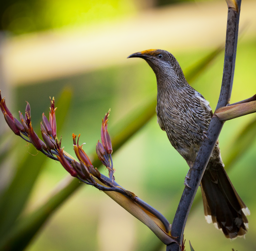

In [ ]:
from fastdownload.core import download_url
urls = search_images('bird photos', max_images=1)
urls[0]
# download take a look at an image
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress = False)

im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'bug photos'


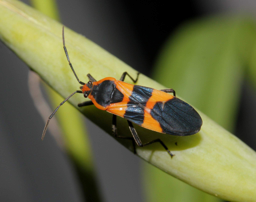

In [ ]:
from fastdownload.core import download_url
urls = search_images('bug photos', max_images=1)
urls[0]
# download take a look at an image
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress = False)

im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
# download some bird and bug images from the web and store it in a directory
# in the current path labelled "bird_or_not"
# files download into 2 seperate folders inside the "bird_or_not" folder
searches = 'bird', 'bug'
path = Path('bird_or_not')
from time import sleep
for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok = True, parents = True)
  download_images(dest, urls = search_images(f'{o} photo', max_images=1000))
  sleep(10)
  resize_images(path/o, max_size = 400, dest=path/o)


Searching for 'bird photo'


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Searching for 'bug photo'


In [ ]:
#verify the downloads and remove failiures
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

21

In [ ]:
#finds all images in a path by file extension
get_image_files(path) 
dls = DataBlock(
    # define the type of data we're working it (image block) and output type(classification)
    blocks=(ImageBlock, CategoryBlock),
    # get the images from:
    get_items = get_image_files,
    # do a train-test split with 20% of the data to validation
    splitter= RandomSplitter(valid_pct = 0.2, seed = 42),
    # Get the name of each folder as the training label
    get_y = parent_label,
    # resize each image - most CV architectures need your images to be the same size
    # here, resize to 192x192 by squishing the image.
    item_tfms = [Resize(192, method = 'squish')]
    # create dataloaders that handles the feeding of the data in batches (here of size 32) to the GPU
).dataloaders(path, bs = 32) 

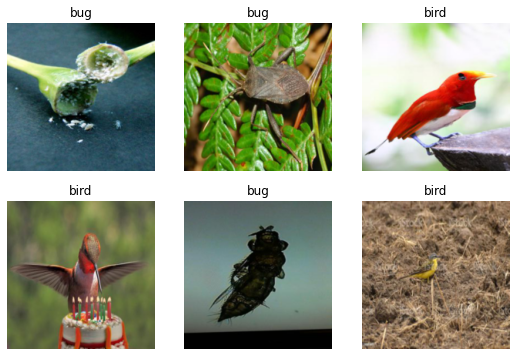

In [ ]:
# take a look at a batch of the data that will provided to the model in one iteration
dls.show_batch(max_n = 6)

In [ ]:
# create a leaner : combines the data we care about + the model we want to use.
# We don't start with a "bare model" - we will use some pretrained ones that already exist that perform well
# a list of other models available in fastai can be found here : https://rwightman.github.io/pytorch-image-models/results/
learn = vision_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.597796,0.337409,0.104110,02:54


epoch,train_loss,valid_loss,error_rate,time
0,0.322293,0.306513,0.084932,04:18
1,0.226599,0.256286,0.084932,04:13
2,0.111571,0.234486,0.076712,04:17


In [ ]:
# Test our model with a couple images in current path
# add an image to the working directory by dragging it into the column on the left.
is_bird, _ , probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a  : {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.5f}")

This is a  : bird.
Probability it's a bird: 0.99986
